# 1. Frame the problem and look at the big picture

The problem of home credit default risk: People with low or non-existing credit histories are taken advantage of by untrustworthy lenders. To determine whether an applicant of a loan will be able to repay it. 
We will be using supervised learning because we have many attributes inputs and outputs a boolean value to determine if they will repay their loan. Our model will learn from this data and predict whether or not the applicants will pay their loan. By using classification. 

We have a binary variable, 0 and 1. 0 if they will pay the loan in time, and 1 will have problems paying the loan. The performance will be measured by looking at the accuracy of our data compared to the test set.

The performance measure is a good guidance for giving out loans. With new appliers, bankers could use the solution if its good enough, and reconsider with their own expertise. The minimum performance should be on the same level as human expertise to be used for reaching the business objective. There need to be expertise from bankers to approve wether an applier should get a loan or not. We assume that the results has a combination with age, annually income, other loans, type of loans, credit values. We will look at these values in the data set.

## Imports

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# File system management
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler
# Imputer
from sklearn.impute import SimpleImputer

# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# 2. Get the data

In [3]:
#List files 
print(os.listdir('home-credit-default-risk/'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [4]:
#Training data and test data
train_data = pd.read_csv('home-credit-default-risk/application_train.csv')
test_data = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Training data dimensions: ', train_data.shape)

train_data.head()

Training data dimensions:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Testing data dimensions: ', test_data.shape)
test_data.head()

Testing data dimensions:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The test set is the smaller set of the train set, and also dont include the target column. This is is because the test set should not include the predictions we are going to make.

# 3. Explore the data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Target attributes

In [8]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

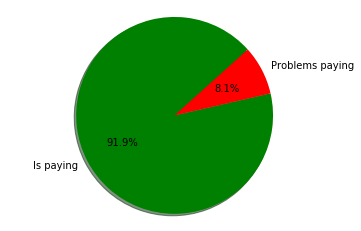

In [9]:
# Data to plot
labels = 'Is paying', 'Problems paying'
sizes = [train_data['TARGET'].value_counts()[0],train_data['TARGET'].value_counts()[1]]
colors = ['green', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=42.0)
plt.axis('equal')
plt.show()

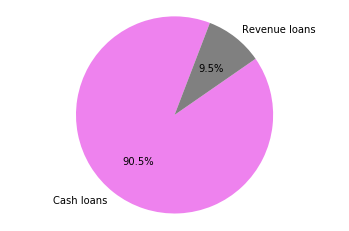

In [10]:
labels = 'Cash loans', 'Revenue loans'
sizes = [train_data['NAME_CONTRACT_TYPE'].value_counts()[0], train_data['NAME_CONTRACT_TYPE'].value_counts()[1]]
colors = ['violet', 'grey']

plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle= 69)
plt.axis('equal')
plt.show()

The type of loans

## Missing values

In [11]:
#We need a function to test if there are any null-values
def missing_values(dataframe):
    #Sum of total missing values
    mis_val = dataframe.isnull().sum() #count the null-values in the dataframe
    
    #Percentage of the sum
    per_val = 100 * mis_val / len(dataframe)
    
    #Visualize the results
    tab_val = pd.concat([mis_val, per_val], axis=1) #concatinate the values together
    
    #Name the columns
    mis_val_columns = tab_val.rename(columns = {0 : 'Missing values', 
                                      1 : 'Percent of total values'})
    #Sort the table
    mis_val_columns = mis_val_columns[mis_val_columns.iloc[:,1] != 0].sort_values(
        'Percent of total values', ascending=False).round(1) ##COMMENT
    
    #Print information
    print("The selected dataframe has " + str(dataframe.shape[1]) + " columns.\n"
          "There are " + str(mis_val_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_columns

In [12]:
missing_values = missing_values(train_data)
missing_values.head(10)

The selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing values,Percent of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18605710>,
      dtype=object)

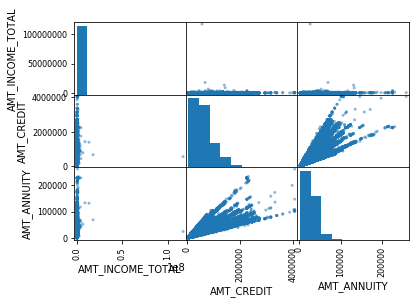

In [13]:
attributes = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]
scatter_matrix(train_data[attributes])

## Correlations between attributes

In [65]:
corr_matrix = train_data.corr()['TARGET'].sort_values(ascending=False)

In [66]:
print('Most Positive Correlations:\n', corr_matrix.tail(15))
print('\nMost Negative Correlations:\n', corr_matrix.head(15))

Most Positive Correlations:
 AMT_GOODS_PRICE                        -0.039645
HOUSETYPE_MODE_block of flats          -0.040594
EMERGENCYSTATE_MODE_No                 -0.042201
FLOORSMAX_MODE                         -0.043226
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
NAME_INCOME_TYPE_Pensioner             -0.046209
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
DAYS_BIRTH                             -0.078239
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, dtype: float64

Most Negative Correlations:
 TARGET                                               1.000000
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          

We can see the correlations between days_birth and target is the highest positive correlation. But DAYS_BIRTH has a negative value, meaning when the clients gets older, they are less likely to default.

In [67]:
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

-0.07823930830982712

Now that we have taken the absolute value of days birth, we have acquired a negative correlation between target and days birth. This means that the older the client is, the more likely the client is to pay the loan.

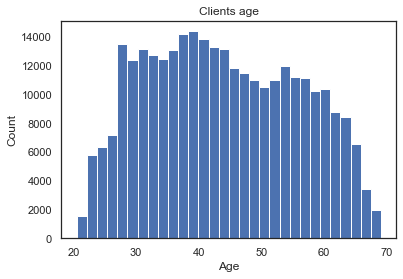

In [68]:
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor='white', bins= 30)
plt.title('Clients age');
plt.xlabel('Age');
plt.ylabel('Count');

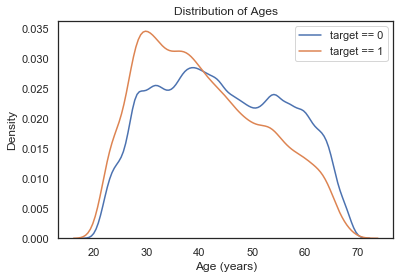

In [71]:
#Kernel density plot
#display all days birth with target = 0
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
#display all days birth with target = 1
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

We can see that clients in the age up to 40 has more problems paying their loans, while clients over 40 is more evenly distributed.

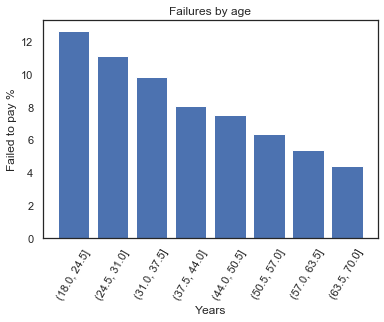

In [74]:
#Separate the data
age_data = train_data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
#store in 7 years span
age_data['YEARS_SPAN'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 9))

#group the data
age_group = age_data.groupby('YEARS_SPAN').mean()

#barchart
plt.bar(age_group.index.astype(str), 100 * age_group['TARGET'])

#plot 
plt.xticks(rotation = 60);
plt.xlabel('Years');
plt.ylabel('Failed to pay %');
plt.title('Failures by age');

This shows that younger the people, the higher possibility of not repaying their loans.

In [75]:
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


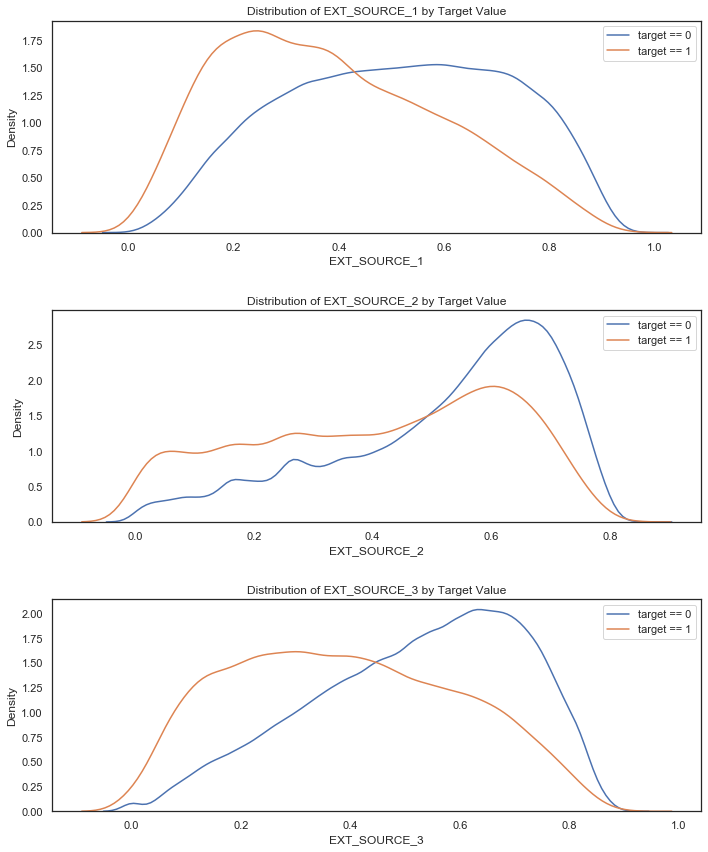

In [77]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Found already plotted external sources 1-3 and can see the correlation between this and failure to pay.

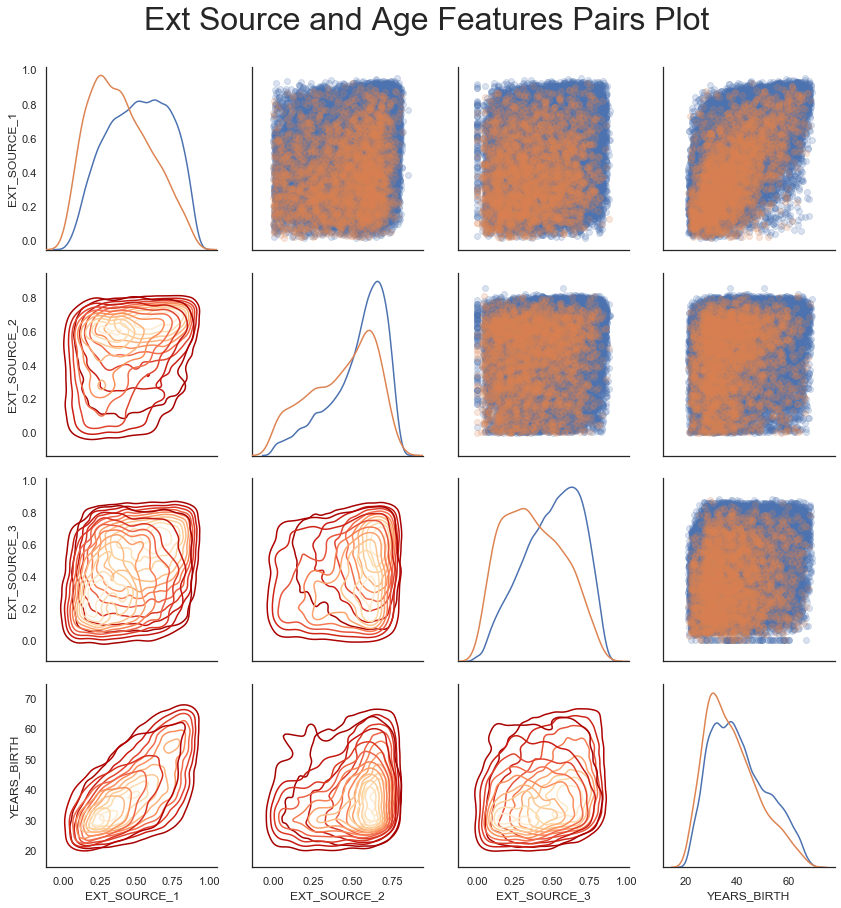

In [78]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# 4. Prepare the data

## Checking the datatypes

For the models to train, we need to get rid of text and boolean values. We start to identify the objects columns, and fill the cells with numbers.

In [14]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Visualize every columns with objects and how many objects it contains

In [15]:
train_data.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

## LabelEncoder under 2 unique categories

In [16]:
encoder = LabelEncoder()
count = 0

#Iterate through the table
for col in train_data:
    #If the column datatype is an object
    if train_data[col].dtype == 'object': 
        
        if len(list(train_data[col].unique())) <= 2: #WHY
            
            encoder.fit(train_data[col]) #fit the data
            train_data[col] = encoder.transform(train_data[col]) #transform the train set
            test_data[col] = encoder.transform(test_data[col]) #transform the test set
            
            
            count += 1 #add 1 to count each column that were encoded
        
print(str(count) + ' columns were label encoded.')

3 columns were label encoded.


## OneHotEncoder over 2 unique categories

In [17]:
#Indicating it exists objects in the columns
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

print('Training Features shape: ', train_data.shape)
print('Test Features shape: ', test_data.shape)

Training Features shape:  (307511, 243)
Test Features shape:  (48744, 239)


## Align train and test

We need to have equal features in the test set and the train set to predict the scores.

In [18]:
train_labels = train_data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

# Add the target back in
train_data['TARGET'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Exploratory data analysis

To find anomalies or outliers in the data, we need to take a look at the correlations to find which features that interferes the target.

In [80]:
train_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

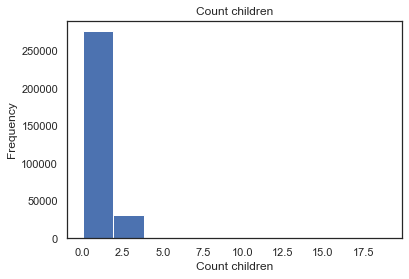

In [81]:
train_data['CNT_CHILDREN'].plot.hist(title = 'Count children');
plt.xlabel('Count children');

19 children seems a lot, but it is possible. 19 children is an outlier.

In [21]:
anom = train_data[train_data['CNT_CHILDREN'] >= 15]
non_anom = train_data[train_data['CNT_CHILDREN'] != 19]
print('The non anomalies default on %0.2f%% of counts' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of counts' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous children counts' % len(anom))

The non anomalies default on 8.07% of counts
The anomalies default on 0.00% of counts
There are 2 anomalous children counts


Strange, but it is a small number. We then take a look at the feature with the nearest correlation with the Target value, DAYS_EMPLOYED

In [54]:
train_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

Maxiumum value is almost a 1000 years. How many of those are outliers?

In [23]:
anom = train_data[train_data['DAYS_EMPLOYED'] == 365243]
non_anom = train_data[train_data['DAYS_EMPLOYED'] != 365243]
print('The non anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


There are 55374 anomalous values, we can change the values to NAN. We need to state if it are anomality or not. We add a column with a boolean value, indicating wether or not the value is anomalous.

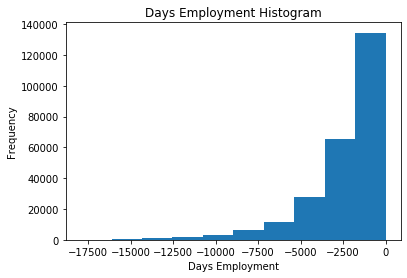

In [24]:
train_data['DAYS_EMPLOYED_ANOM'] = train_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
#plot
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Comment

In [25]:
test_data['DAYS_EMPLOYED_ANOM'] = test_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
test_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_data['DAYS_EMPLOYED_ANOM'].sum(), len(test_data)))

There are 9274 anomalies in the test data out of 48744 entries


## Fill in missing values

We need to change the NaN's to median. And the bool-type to 0 and 1.

In [26]:
median_test = np.median(test_data['DAYS_EMPLOYED'])
median_train = np.median(train_data['DAYS_EMPLOYED'])

In [27]:
train_data['DAYS_EMPLOYED'].replace({np.nan: median_train}, inplace = True)
test_data['DAYS_EMPLOYED'].replace({np.nan: median_test}, inplace = True)

In [28]:
train_data['DAYS_EMPLOYED_ANOM'].replace({True: 1,False: 0}, inplace = True)
test_data['DAYS_EMPLOYED_ANOM'].replace({True: 1,False: 0}, inplace = True)


Change arbitrary NaN to median of the Y column

In [29]:
train_data.fillna(train_data.mean()) #Could try median too

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,1,0,1,0,0,0
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,1,0,1,0,0,1
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,1,0,0,1,0,0,0
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,1,0,1,0,1,0


In [30]:
test_data.fillna(test_data.mean())

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,1,0,1,0,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,1,0,0,1,0,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,0,0,0,0,0
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,0,0,0,0,1,0,1,0,0
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0,0,0,0,1,0,0,1,0,0


We have replaced every object or Nan into numbers, so that we can train the models.

## Polynomial Features

Making the three least correlated features and the most correlated feature towards target a new dataframe. We impute the data to assure that every value converts to the median.

In [39]:
# Make a new dataframe for polynomial features
poly_features = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [40]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [41]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [42]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_data['SK_ID_CURR']
train_poly = train_data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_data['SK_ID_CURR']
test_poly = test_data.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


# 5. Short-List Promising Models 

Using minmax scaler

In [43]:
# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_data)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [44]:
y = train_data['TARGET']
X = train_data.drop(['TARGET'], axis=1)
#X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [45]:
#Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

#Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Make predictions
# Make sure to select the second column only
#log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [47]:
# Submission dataframe
#submit = test_data[['SK_ID_CURR']]
#submit['TARGET'] = log_reg_pred

#submit.head()

In [48]:
# Save the submission to a csv file
#submit.to_csv('log_reg_baseline.csv', index = False)

## Decision Tree

In [ ]:
#tree_reg = DecisionTreeRegressor(max_depth=50)
#tree_reg.fit(train, train_labels)

In [ ]:
#Making predictions
#dec_tree_pred = tree_reg.predict(test)
#print(dec_tree_pred.shape)

In [ ]:
# Submission dataframe
#submit = test_data[['SK_ID_CURR']]
#submit['TARGET'] = dec_tree_pred

#submit.head()

In [ ]:
#Submit file
#submit.to_csv('tree_reg_baseline.csv', index = False)

## Random Forest Classifier

In [ ]:
# Make the random forest classifier
#random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
#random_forest.fit(train, train_labels)

# Extract feature importances
#feature_importance_values = random_forest.feature_importances_
#feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
#predictions = random_forest.predict_proba(test)[:, 1]

In [ ]:
# Make a submission dataframe
#submit = test_data[['SK_ID_CURR']]
#submit['TARGET'] = predictions

# Save the submission dataframe
#submit.to_csv('random_forest_baseline.csv', index = False)

## AdaBoost

In [ ]:
#svc = SVC(probability=True, kernel='linear')

#Create AdaBoost
#abc = AdaBoostClassifier(n_estimators=1, base_estimator=svc,learning_rate=1.0)

#Train Adaboost Classifer
#model = abc.fit(train, train_labels)

#Predict the response for test dataset
#y_pred = model.predict(train)

In [ ]:
#print(train)
#train.sum().sum()

In [ ]:
#test_data[['SK_ID_CURR']].size

In [ ]:
#submit = test_data[['SK_ID_CURR']]
#submit['TARGET'] = y_pred

#submit.head()

In [ ]:
#submit.to_csv('ada_baseline.csv', index = False)

# Gradient Boosting

In [55]:
X_train['NAME_CONTRACT_TYPE'].head(11)

290720    0
219406    0
238458    0
189443    0
32184     0
125672    0
288843    0
183625    0
121380    0
276441    0
47203     0
Name: NAME_CONTRACT_TYPE, dtype: int64

In [56]:
X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
290720,436794,0,0,1,0,180000.0,835380.0,33259.5,675000.0,0.018029,...,0,0,0,0,0,0,0,0,0,0
219406,354174,0,1,1,0,225000.0,1256400.0,40657.5,900000.0,0.010556,...,0,0,0,0,0,0,1,1,0,0
238458,376164,0,0,1,1,225000.0,387144.0,30717.0,342000.0,0.046220,...,0,0,0,0,0,1,0,1,0,0
189443,319651,0,0,0,0,180000.0,450000.0,33646.5,450000.0,0.026392,...,0,0,0,0,1,0,0,1,0,0
32184,137317,0,0,1,0,108000.0,288873.0,14179.5,238500.0,0.003813,...,0,0,0,0,0,0,0,0,0,1


In [57]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(train, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
y2 = y - tree_reg1.predict(test)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(train, y2)

ValueError: operands could not be broadcast together with shapes (50,307511) (48744,) 

In [ ]:
y3 = y2 - tree_reg2.predict(X_test)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, y3)

In [ ]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

## Light Gradient Boosting

Light GBM is sensitive to overfitting and can easily overfit small data. The suggestions for number of row use, is over 10.000 rows. We have over 300 thousand.

In [ ]:
#d_train = lgb.Dataset(train_data)

#params = {}
#params['learning_rate'] = 0.003
#params['boosting_type'] = 'gbdt'
#params['objective'] = 'binary'
#params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
#params['num_leaves'] = 20
#params['min_data'] = 50
#params['max_depth'] = 10

#clf = lgb.train(params, d_train, 100)

In [ ]:
#Prediction
#y_pred=clf.predict(test_data)
#convert into binary values
#for i in range(0,99):
#    if y_pred[i]>=.5:       # setting threshold to .5
#           y_pred[i]=1
#    else:  
#           y_pred[i]=0

In [ ]:
#Confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#Accuracy

#accuracy=accuracy_score(y_pred,y_test)

In [ ]:
#Making predictions
#lgb_pred=clf.predict(X_test, label=y_test)

In [ ]:
#lgb_pred.size

In [ ]:
#train_data[['SK_ID_CURR']].size

In [ ]:
# Submission dataframe
#submit = test_data[['SK_ID_CURR']]
#submit['TARGET'] = lgb_pred

#submit.head()

In [ ]:
#submit.to_csv('lgb_baseline.csv', index = False)

# 6. Fine tune the system

# 7. Present your solution

# 8. Launch, monitor and maintain your system